# <center> AI - CA0<br>Name: Shahryar Namdari<br>ID: 810098043<br>24/2/2022<center>

## Question 1

In [1]:
import pandas as pd
import timeit
import matplotlib.pyplot as plt
from scipy.stats import norm
from shapely.geometry import Point, LineString
import numpy as np

my_file = pd.read_csv('D:\\term8\\AI\\CA0\\bank_term_deposit.csv')

In [2]:
#The tail() function is used to return the last n rows
# n = 3
my_file.tail(3)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


In [3]:
#The head() function is used to return the first n rows
# n = 2
my_file.head(2)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no


In [4]:
#The describe() method is used for calculating some statistical data like percentile,
#mean and std of the numerical values of the Series or DataFrame
#count - The number of not-empty values.
#mean - The average (mean) value.
#std - The standard deviation.
#min - the minimum value.
#25% - The 25% percentile*.
#50% - The 50% percentile*.
#75% - The 75% percentile*.
#max - the maximum value.
my_file.describe();

In [5]:
#The info() function is used to print a concise summary of a DataFrame.
#This method prints information about a DataFrame including the index dtype 
#and column dtypes, non-null values and memory usage
my_file.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
age          3984 non-null float64
job          4521 non-null object
marital      4401 non-null object
education    4521 non-null object
balance      4164 non-null float64
housing      4302 non-null object
loan         4521 non-null object
duration     4388 non-null float64
campaign     4521 non-null int64
pdays        4521 non-null int64
poutcome     4521 non-null object
y            4087 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


## Question 2

In [6]:
#from the info method it is obvious 
#that we have five Numerical and 7 Categorical column
#numerical: age,balance, duration, campaign, pdays
#categorical: job, marital, education, housing, loan, poutcome, y

#converting categorical to numerical
job = {"unemployed":1, "services":2, "management":3, "blue-collar":4, "self-employed":5, "technician":6,\
       "entrepreneur":7, "admin.":8, "student":9, "housemaid":10, "retired":11, "unknown":11}
my_file["job"] = my_file["job"].map(job)

marital = {"married":1, "single":2, "divorced":3}
my_file["marital"] = my_file["marital"].map(marital)

education = {"primary":1, "secondary":2, "tertiary":3, "unknown":4}
my_file["education"] = my_file["education"].map(education)

housing_loan_y = {"yes":1, "no":2}
my_file["housing"] = my_file["housing"].map(housing_loan_y)
my_file["loan"] = my_file["loan"].map(housing_loan_y)
my_file["y"] = my_file["y"].map(housing_loan_y)

poutcome = {"unknown":1, "failure":2, "other":3, "success":4}
my_file["poutcome"] = my_file["poutcome"].map(poutcome)

#another way to do this
# my_file.job = my_file.job.astype("category").cat.codes
# my_file.marital = my_file.marital.astype("category").cat.codes
# my_file.education = my_file.education.astype("category").cat.codes
# my_file.housing = my_file.housing.astype("category").cat.codes
# my_file.loan = my_file.loan.astype("category").cat.codes
# my_file.poutcome = my_file.poutcome.astype("category").cat.codes
#my_file.y = my_file.y.astype("category").cat.codes # 1=No and 2=yes

my_file

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,1,1.0,1,1787.0,2.0,2,79.0,1,-1,1,2.0
1,33.0,2,1.0,2,4789.0,1.0,1,NaN,1,339,2,2.0
2,NaN,3,2.0,3,135.0,1.0,2,185.0,1,330,2,2.0
3,30.0,3,1.0,3,1476.0,1.0,1,199.0,4,-1,1,2.0
4,59.0,4,1.0,2,NaN,1.0,2,226.0,1,-1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,2,1.0,2,-333.0,1.0,2,329.0,5,-1,1,2.0
4517,57.0,5,1.0,3,-3313.0,1.0,1,153.0,1,-1,1,2.0
4518,57.0,6,1.0,2,295.0,2.0,2,151.0,11,-1,1,2.0
4519,28.0,4,1.0,2,1137.0,2.0,2,129.0,4,211,3,2.0


## Question 3

In [7]:
#finding num of rows that has NaN value for each column
my_file.isna().sum()

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

In [8]:
#now we should put mean and mode value of each column in NaN values of that column except y column
#mean for numerical and mode for categorical
#numerical: age,balance, duration, campaign, pdays
#categorical: job, marital, education, housing, loan, poutcome, y

my_file["age"].fillna((my_file["age"].mean()), inplace=True)
my_file["balance"].fillna((my_file["balance"].mean()), inplace=True)
my_file["duration"].fillna((my_file["duration"].mean()), inplace=True)
my_file["campaign"].fillna((my_file["campaign"].mean()), inplace=True)
my_file["pdays"].fillna((my_file["pdays"].mean()), inplace=True)

my_file["job"].fillna((my_file["job"].mode()), inplace=True)
my_file["marital"].fillna((my_file["marital"].mode()), inplace=True)
my_file["education"].fillna((my_file["education"].mode()), inplace=True)
my_file["housing"].fillna((my_file["housing"].mode()), inplace=True)
my_file["loan"].fillna((my_file["loan"].mode()), inplace=True)
my_file["poutcome"].fillna((my_file["poutcome"].mode()), inplace=True)

Advantages and Disadvantages of filling NaN with mean value:

Advantages: it is almost ok to replace empty values with mean value :) and it is so easy to do that. although I replaced NaN data for categorical columns with mode value. It does make more sense.

Disadvantages: it is not gonna consider other features of that guy. Also it reduces the variance.

In [9]:
new_df = my_file[my_file["y"].isnull()]
my_file.dropna(subset = ["y"], inplace=True)
my_file # we are gonna use this data frame from now on

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,1,1.0,1,1787.00000,2.0,2,79.00000,1,-1,1,2.0
1,33.00000,2,1.0,2,4789.00000,1.0,1,264.72402,1,339,2,2.0
2,41.61747,3,2.0,3,135.00000,1.0,2,185.00000,1,330,2,2.0
3,30.00000,3,1.0,3,1476.00000,1.0,1,199.00000,4,-1,1,2.0
4,59.00000,4,1.0,2,1136.75024,1.0,2,226.00000,1,-1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,2,1.0,2,-333.00000,1.0,2,329.00000,5,-1,1,2.0
4517,57.00000,5,1.0,3,-3313.00000,1.0,1,153.00000,1,-1,1,2.0
4518,57.00000,6,1.0,2,295.00000,2.0,2,151.00000,11,-1,1,2.0
4519,28.00000,4,1.0,2,1137.00000,2.0,2,129.00000,4,211,3,2.0


## Question 4

In [10]:
X = my_file["housing"].where(my_file["housing"] == 1).sum()
print("housing(yes): ", X)
X = my_file["housing"].where(my_file["housing"] == 2).sum()/2
print("housing(no): ", X)

housing(yes):  2188.0
housing(no):  1698.0


In [11]:
X = my_file["y"].where(my_file["y"] == 1).sum()
print("y(yes): ", X)
X = my_file["y"].where(my_file["y"] == 2).sum()/2
print("y(no): ", X)

y(yes):  464.0
y(no):  3623.0


## Question 5

In [12]:
X = my_file[(my_file["age"] > 35) & (my_file["marital"] == 2) & (my_file["poutcome"] == 4)].count()
print(X[0])

14


## Question 6

In [13]:
start1 = timeit.timeit()
X = my_file[my_file["education"] == 2]
print("ans: ", X["balance"].mean())
end1 = timeit.timeit()
print("time: ", abs(end1 - start1)*1000,"ms")

ans:  950.7017237980879
time:  8.698299999999826 ms


## Question 7

In [14]:
start2 = timeit.timeit()
count = 0
sum = 0
for index, row in my_file.iterrows():
    if row["education"] == 2:
        count += 1
        sum += row["balance"]
print("ans: ", sum/count)
end2 = timeit.timeit()
print("time: ", abs(end2 - start2)*1000,"ms")

ans:  950.7017237980879
time:  12.498799999999477 ms


It is clear that solving with Vectorization is much more faster than solving with For Loop

## Question 8

age: 


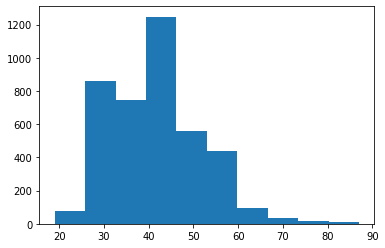

job: 


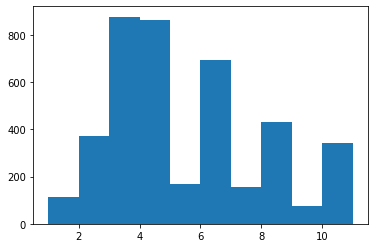

marital: 


C:\Users\BRayaneh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\BRayaneh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


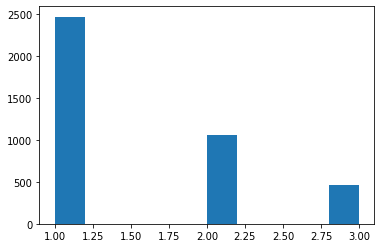

education: 


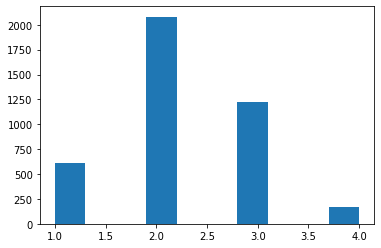

balance: 


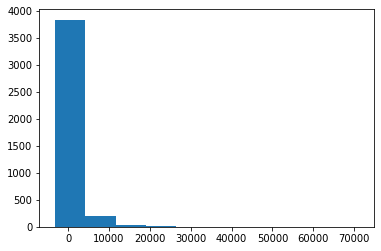

housing: 


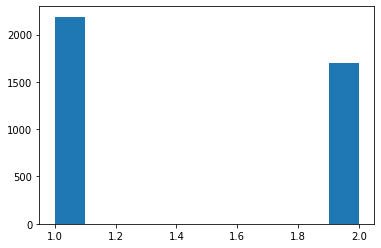

loan: 


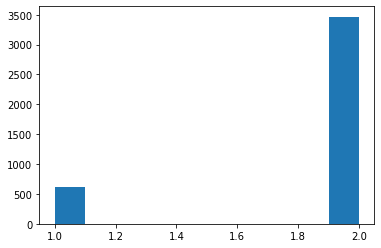

duration: 


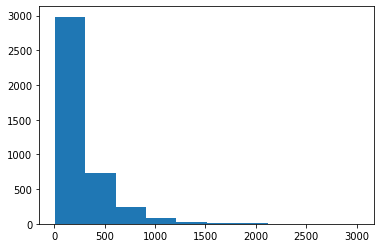

campaign: 


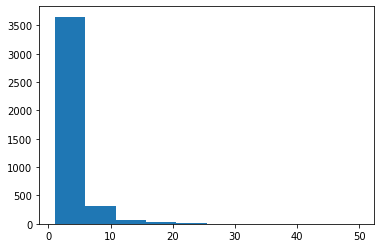

pdays: 


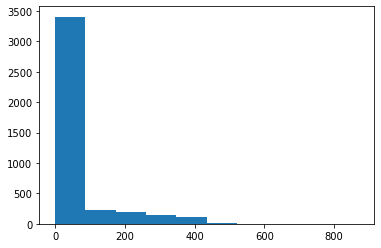

poutcome: 


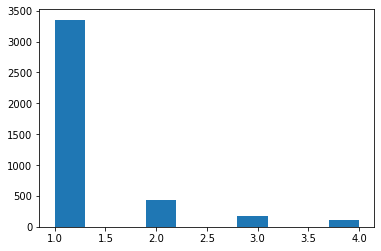

y: 


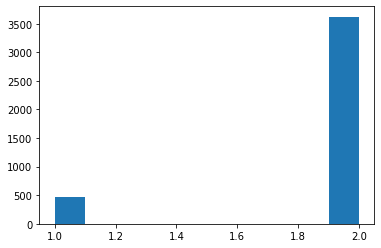

In [15]:
plt.hist(my_file["age"])
print("age: ")
plt.show()

plt.hist(my_file["job"])
print("job: ")
plt.show()

plt.hist(my_file["marital"])
print("marital: ")
plt.show()

plt.hist(my_file["education"])
print("education: ")
plt.show()

plt.hist(my_file["balance"])
print("balance: ")
plt.show()

plt.hist(my_file["housing"])
print("housing: ")
plt.show()

plt.hist(my_file["loan"])
print("loan: ")
plt.show()

plt.hist(my_file["duration"])
print("duration: ")
plt.show()

plt.hist(my_file["campaign"])
print("campaign: ")
plt.show()

plt.hist(my_file["pdays"])
print("pdays: ")
plt.show()

plt.hist(my_file["poutcome"])
print("poutcome: ")
plt.show()

plt.hist(my_file["y"])
print("y: ")
plt.show()

In [16]:
#dropping categorical columns : job, marital, education, housing, loan, poutcome, y
my_file_numerical = my_file.copy(deep=True)
my_file_numerical.drop("job",inplace=True,axis=1)
my_file_numerical.drop("marital",inplace=True,axis=1)
my_file_numerical.drop("education",inplace=True,axis=1)
my_file_numerical.drop("housing",inplace=True,axis=1)
my_file_numerical.drop("loan",inplace=True,axis=1)
my_file_numerical.drop("poutcome",inplace=True,axis=1)
not_NaN_y_column = my_file_numerical["y"]
my_file_numerical.drop("y",inplace=True,axis=1)
my_file_numerical

,age,balance,duration,campaign,pdays
0,30.00000,1787.00000,79.00000,1,-1
1,33.00000,4789.00000,264.72402,1,339
2,41.61747,135.00000,185.00000,1,330
3,30.00000,1476.00000,199.00000,4,-1
4,59.00000,1136.75024,226.00000,1,-1
...,...,...,...,...,...
4516,33.00000,-333.00000,329.00000,5,-1
4517,57.00000,-3313.00000,153.00000,1,-1
4518,57.00000,295.00000,151.00000,11,-1
4519,28.00000,1137.00000,129.00000,4,211


## Question 9

In [17]:
normalized_file = (my_file_numerical-my_file_numerical.mean())/my_file_numerical.std()
normalized_file

,age,balance,duration,campaign,pdays
0,-1.154366,0.255388,-0.724620,-0.573012,-0.404051
1,-0.856422,1.406374,-0.005131,-0.573012,3.031432
2,-0.000582,-0.378000,-0.313979,-0.573012,2.940492
3,-1.154366,0.136148,-0.259744,0.380660,-0.404051
4,1.725758,0.006078,-0.155147,-0.573012,-0.404051
...,...,...,...,...,...
4516,-0.856422,-0.557434,0.243872,0.698550,-0.404051
4517,1.527129,-1.699986,-0.437946,-0.573012,-0.404051
4518,1.527129,-0.316655,-0.445694,2.605894,-0.404051
4519,-1.352996,0.006173,-0.530922,0.380660,1.738074


## Question 10

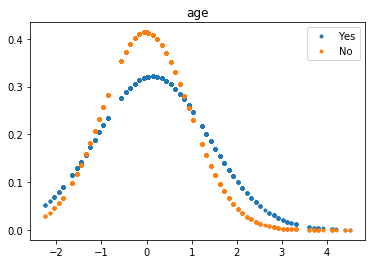

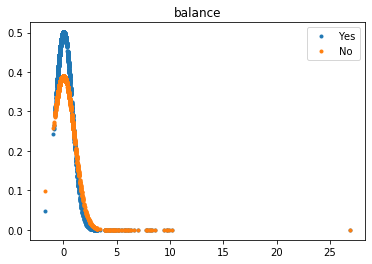

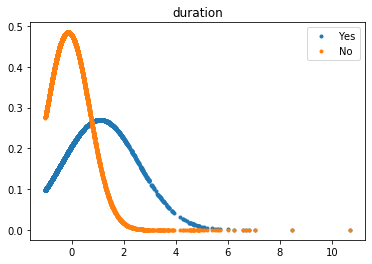

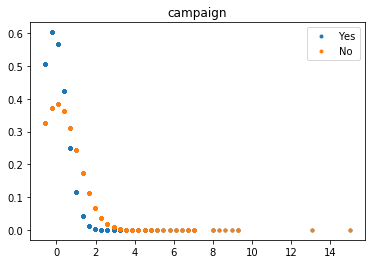

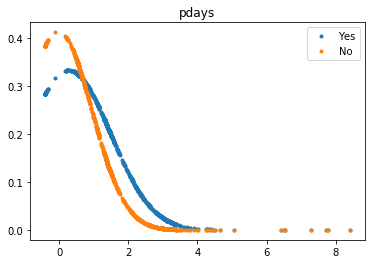

In [18]:
#Finding Mean and Standard deviation for not_NaN_y_Column
y_yes_mean = normalized_file[my_file["y"] == 1].mean()
y_yes_std = normalized_file[my_file["y"] == 1].std()

y_no_mean = normalized_file[my_file["y"] == 2].mean()
y_no_std = normalized_file[my_file["y"] == 2].std()

def plot_func(column_name):
    x = normalized_file[column_name]
    y_yes = norm.pdf(x,y_yes_mean[column_name],y_yes_std[column_name])
    y_no = norm.pdf(x,y_no_mean[column_name],y_no_std[column_name])
    plt.plot(x,y_yes,'.')
    plt.plot(x,y_no,'.')
    plt.title(column_name)
    plt.legend(["Yes","No"])
    plt.show()
    
plot_func("age")
plot_func("balance")
plot_func("duration")
plot_func("campaign")
plot_func("pdays")

It seems that duration feature is the best for prediction beacause other features are all close in two states but two states in duration are seperate enough. So we are gonna use duration.

In these figures, x axis is sorted value of eatch feature and y axis is PDF.

## Question 11

In [22]:
x = normalized_file["duration"]
y_yes = norm.pdf(x,y_yes_mean["duration"],y_yes_std["duration"])
y_no = norm.pdf(x,y_no_mean["duration"],y_no_std["duration"])
diff = np.abs(y_no - y_yes)
collision = np.abs(min(x[np.where(diff<0.001)[0]]))
print(collision)

0.6006530167045605


In [20]:
normalized_new_df = (new_df-new_df.mean())/new_df.std()
normalized_new_df["y"][normalized_new_df["duration"]>collision] = 1
normalized_new_df["y"][normalized_new_df["duration"]<collision] = 2

In [21]:
normalized_new_df.to_csv('D:\\term8\\AI\\CA0\\result.csv')